/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


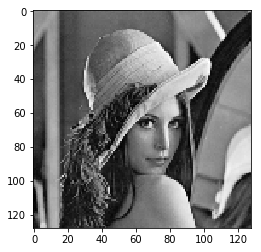

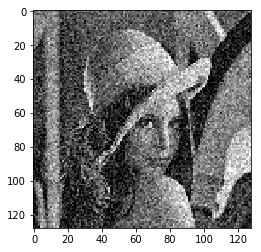

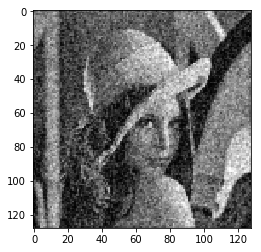

MSE = 495.57489475739465


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from skimage.transform import rescale, resize
import imageio

def read_image(name):
    image = imageio.imread(name)
    image = resize(image,(128,128))
    image = 255 * image
    image = image.astype(np.uint8)
    data = image.ravel()
    return image, data
    
def show_image(image):
    image = np.array([image])
    image = np.reshape(image, (128,128))
    image = resize(image,(128,128))
    plt.imshow(image,cmap=cm.gray)
    plt.show()
    
def add_noise(data):
    mean = 0
    variance = 30
    gauss = np.random.normal(mean, variance, len(data))
    data = data + gauss
    data[data > 255] = 255
    data[data < 0] = 0
    return data

def ICM(noisy_image):
    h = 1.0
    beta = 1.0
    eta = 7
    image1 = np.reshape(noisy_image, (128,128))
    noisy_image = np.reshape(noisy_image, (128,128))
    for row in range(image1.shape[0]):
        for col in range(image1.shape[1]):
            image1[row,col] = min_energy(noisy_image, image1, row, col, h, beta, eta)
    return image1
            
def min_energy(noisy_image,image,row,col,h,beta,eta):
    pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        pixel += 2*beta*image[row-1,col]
    if col > 0:
        pixel += 2*beta*image[row,col-1]
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = pixel/(2*h+2*beta*4+2*eta)
    if pixel > 255:
        pixel = 255
    return pixel

def MSE(denoised_image, image):
    image = np.array([image])
    image = image.reshape(128,128)
    mse = ((denoised_image - image)**2).mean(axis=None)
    return mse

if __name__=="__main__":
    name="/Users/johanabrahamsson/Documents/Machine learning and data science/Python/lena_gray.jpg"
    image, data = read_image(name)
    show_image(data)
    noisy_image=add_noise(data)
    show_image(noisy_image)
    denoised_image = ICM(noisy_image)
    mse = MSE(denoised_image,image)
    show_image(denoised_image)
    print("MSE =", mse)